In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.tweet_text[1]

'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'

In [4]:
df.	cyberbullying_type[1]

'not_cyberbullying'

In [5]:
df.tweet_text[0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [6]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "]+", flags=re.UNICODE
)

def is_mostly_english(text):
    english_chars = sum(c.isascii() and c.isalpha() for c in text)
    total_chars = sum(c.isalpha() for c in text)
    return total_chars == 0 or (english_chars / total_chars) > 0.7

def clean_tweet(tweet):
    if not is_mostly_english(tweet):
        return ''
    
    tweet = emoji_pattern.sub('', tweet)
    tweet = re.sub(r'@[\w_]+ ', '', tweet)
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    words = tweet.split()
    cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)

df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
print(df[['tweet_text', 'cleaned_tweet']].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0            words katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2                   classy whore red velvet cupcakes  
3  meh p thanks heads concerned another angry dud...  
4  isis account pretending kurdish account like i...  


In [7]:
# with mkr removal
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "]+", flags=re.UNICODE
)

def is_mostly_english(text):
    english_chars = sum(c.isascii() and c.isalpha() for c in text)
    total_chars = sum(c.isalpha() for c in text)
    return total_chars == 0 or (english_chars / total_chars) > 0.7

def clean_tweet(tweet):
    if not is_mostly_english(tweet):
        return ''
    
    tweet = emoji_pattern.sub('', tweet)
    tweet = re.sub(r'@[\w_]+ ', '', tweet)
    tweet = re.sub(r'#(\w+)', r'\1', tweet)
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    words = tweet.split()
    cleaned_words = [
        word.lower() for word in words 
        if word.lower() not in stop_words and word.lower() != 'mkr'
    ]
    return ' '.join(cleaned_words)

df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
print(df[['tweet_text', 'cleaned_tweet']].head())


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0                words katandandre food crapilicious  
1  aussietv white theblock imacelebrityau today s...  
2                   classy whore red velvet cupcakes  
3  meh p thanks heads concerned another angry dud...  
4  isis account pretending kurdish account like i...  


In [8]:
df.columns
df = df.dropna()
print(f"Null values after dropping: {df.isnull().sum().sum()}")

Null values after dropping: 0


([<matplotlib.patches.Wedge at 0x7bacbbb5e890>,
 [Text(0.9508355784612095, 0.553092851818153, 'religion'),
  Text(-0.010289112228893867, 1.0999518781153752, 'age'),
  Text(-0.960133030043501, 0.5367909878337057, 'gender'),
  Text(-0.9435783150757331, -0.5653847922599623, 'ethnicity'),
  Text(0.018476310761988458, -1.0998448190270418, 'not_cyberbullying'),
  Text(0.9571480988601195, -0.5420954868364604, 'other_cyberbullying')],
 [Text(0.5186375882515687, 0.30168701008262894, '16.77%'),
  Text(-0.005612243033942108, 0.5999737516992956, '16.76%'),
  Text(-0.5237089254782733, 0.29279508427293033, '16.72%'),
  Text(-0.5146790809503998, -0.3083917048690703, '16.69%'),
  Text(0.010077987688357338, -0.5999153558329319, '16.66%'),
  Text(0.5220807811964288, -0.295688447365342, '16.40%')])

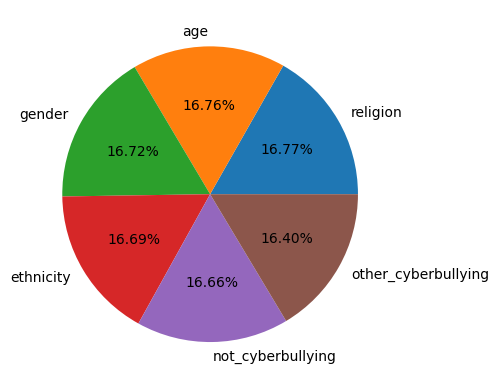

In [9]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")

In [10]:
df['cyberbullying_type'] = df['cyberbullying_type'].apply(
    lambda x: 'not_cyberbullying' if x == 'not_cyberbullying' else 'cyberbullying'
)

([<matplotlib.patches.Wedge at 0x7bacbae2c510>,
 [Text(-0.9527607384216036, 0.5497699294453279, 'cyberbullying'),
  Text(0.9527607126850149, -0.549769974047276, 'not_cyberbullying')],
 [Text(-0.5196876755026928, 0.2998745069701788, '83.34%'),
  Text(0.5196876614645536, -0.29987453129851416, '16.66%')])

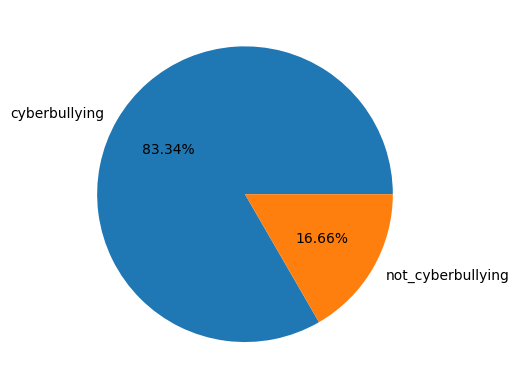

In [11]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")

In [12]:
df.shape

(47692, 3)

In [13]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [14]:
df_major = df[df['cyberbullying_type'] == 'cyberbullying']
df_minor = df[df['cyberbullying_type'] == 'not_cyberbullying']
df_major_downsampled = df_major.sample(n=len(df_minor), random_state=42)
df_balanced = pd.concat([df_major_downsampled, df_minor]).sample(frac=1, random_state=42).reset_index(drop=True)
df = df_balanced
print(df['cyberbullying_type'].value_counts())


cyberbullying_type
cyberbullying        7945
not_cyberbullying    7945
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7bacbae0e1d0>,
 [Text(6.735557395310444e-17, 1.1, 'cyberbullying'),
  Text(-2.0206672185931328e-16, -1.1, 'not_cyberbullying')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-1.1021821192326178e-16, -0.6, '50.00%')])

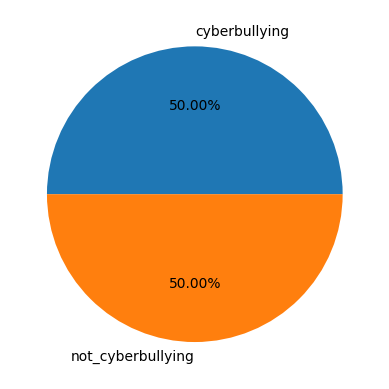

In [15]:
val = df.cyberbullying_type.value_counts()
import matplotlib.pyplot as plt
plt.pie(val,labels = val.index,autopct = "%.2f%%")

In [16]:
df.head()

,tweet_text,cyberbullying_type,cleaned_tweet
0,im so happy the bitch who used to bully me in ...,cyberbullying,im happy bitch used bully middle school fuckin...
1,@eljaverg @RicardoAlemanMx Dude are yuo talkin...,cyberbullying,dude yuo talking abaut familia yuo look idiot ...
2,@Eli_FlockaJames I can't! I'm not a cyber bull...,cyberbullying,cant im cyber bully sad face lol
3,Literally Who? Literally #LawAndOrderSVU.,not_cyberbullying,literally literally lawandordersvu
4,"When I get home, I have 1 million emails to an...",cyberbullying,get home 1 million emails answer httptcodayo0s...


In [17]:
df.head()
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def tokenize_and_vectorize(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embedding = outputs.last_hidden_state[:, 0, :]
    return sentence_embedding

df['embeddings'] = df['cleaned_tweet'].apply(lambda x: tokenize_and_vectorize(x))

print(f"Sample Embeddings for the first row: {df['embeddings'][0]}")
print(f"Shape of the embeddings for first tweet: {df['embeddings'][0].shape}")


2025-04-14 17:27:46.703224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744651666.725848     171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744651666.732550     171 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sample Embeddings for the first row: tensor([[-3.4911e-01,  7.0606e-01, -1.3909e-01, -3.0295e-01, -4.4259e-01,
         -5.4273e-02,  6.6251e-01,  4.9071e-01,  3.1705e-02, -1.8855e-01,
          2.6334e-01, -6.5606e-04, -2.4897e-01,  2.2539e-01,  4.5807e-01,
          3.0490e-01,  5.6412e-02,  4.9907e-01,  1.9558e-01,  6.0959e-02,
         -3.1967e-01, -5.9977e-01,  1.9512e-02, -2.6137e-01,  8.9153e-02,
          1.4043e-01,  1.0951e-01, -1.6941e-01,  3.0461e-01, -2.0565e-01,
         -1.0260e-01,  2.2778e-01,  2.2140e-03, -6.2387e-02,  3.6402e-01,
         -1.1077e-01,  2.9365e-01, -6.7249e-02,  1.7571e-01,  3.5816e-01,
         -4.9437e-01, -2.0304e-01, -9.3605e-02, -2.2291e-01,  1.3604e-01,
         -2.4288e-01, -3.2047e+00, -1.5989e-01,  2.4548e-01, -6.4369e-01,
          5.4302e-01, -6.0991e-01, -2.0400e-01,  4.8080e-01, -4.8950e-01,
          4.1612e-01,  9.1257e-02,  1.4829e-01, -1.2851e-02,  4.6658e-01,
          1.2415e-01,  3.1928e-01, -2.0701e-01,  4.5638e-01, -9.9915e-02,
 

In [18]:
import numpy as np
df['embedding_array'] = df['embeddings'].apply(lambda x: x[0].numpy())
X = np.vstack(df['embedding_array'].values)

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cyberbullying_type'])

In [20]:
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (labels): {y.shape}")

Shape of X (features): (15890, 768)
Shape of y (labels): (15890,)


In [21]:
#pip install --upgrade scikit-learn


Accuracy: 0.7936
Confusion Matrix:
[[1229  349]
 [ 307 1293]]


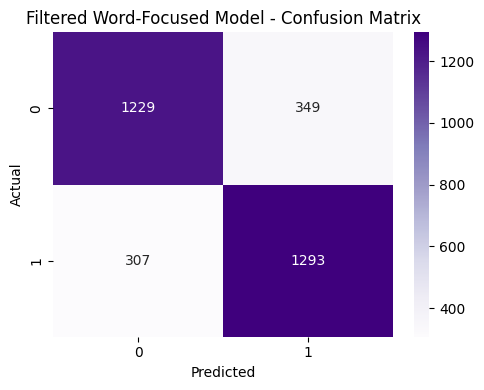

In [22]:

import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

df = df.dropna(subset=["tweet_text", "cyberbullying_type", "embeddings"])

cyber_df = df[df['cyberbullying_type'] == 'cyberbullying']

all_words = []
for text in cyber_df['tweet_text']:
    tokens = str(text).lower().split()
    all_words.extend(tokens)

word_freq = Counter(all_words)
total_words = len(word_freq)
top_n = int(total_words * 0.8)
top_words = set([word for word, _ in word_freq.most_common(top_n)])

filtered_embeddings = []
labels = []

for _, row in df.iterrows():
    word_list = str(row['tweet_text']).lower().split()
    embedding_list = row['embeddings']

    selected_vectors = [vec for word, vec in zip(word_list, embedding_list) if word in top_words]

    if selected_vectors:
        avg_vector = torch.stack(selected_vectors).mean(dim=0)
    else:
        avg_vector = torch.zeros(len(embedding_list[0]))

    filtered_embeddings.append(avg_vector.numpy())
    labels.append(row['cyberbullying_type'])

X = pd.DataFrame(filtered_embeddings)
y = pd.Series(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Filtered Word-Focused Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [23]:
!pip install --upgrade --target=/kaggle/working/sklearn_temp scikit-learn --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 97.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 47.8 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.4 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.4 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
category-encoders 2.7.0 requi

In [24]:
import sys
sys.path.insert(0, '/kaggle/working/sklearn_temp')



--- Logistic Regression ---
Accuracy: 0.8030
Confusion Matrix:
[[1223  355]
 [ 271 1329]]


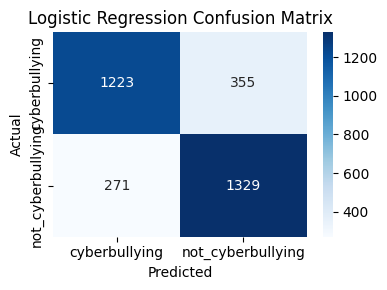


--- Random Forest ---
Accuracy: 0.7920
Confusion Matrix:
[[1221  357]
 [ 304 1296]]


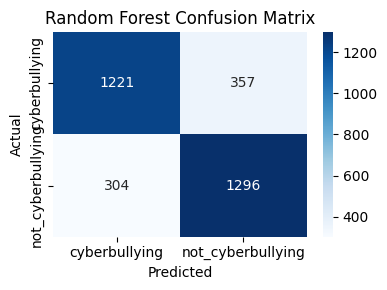


--- Gradient Boosting ---
Accuracy: 0.7983
Confusion Matrix:
[[1201  377]
 [ 264 1336]]


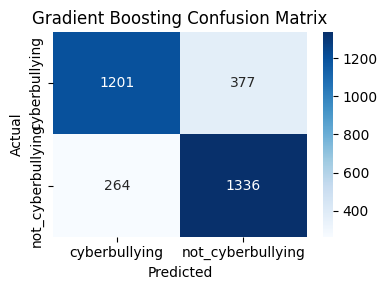


--- SVM (Linear Kernel) ---
Accuracy: 0.8037
Confusion Matrix:
[[1199  379]
 [ 245 1355]]


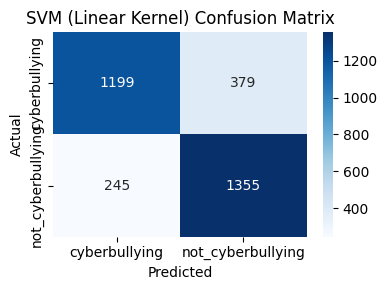


--- XGBoost Classifier ---
Accuracy: 0.7958
Confusion Matrix:
[[1193  385]
 [ 264 1336]]


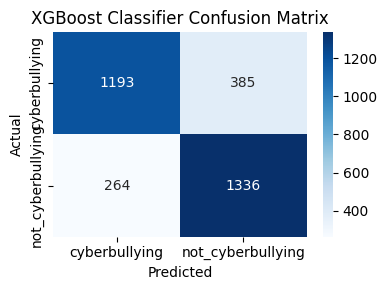

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder  # New import
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Updated models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Evaluation loop
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


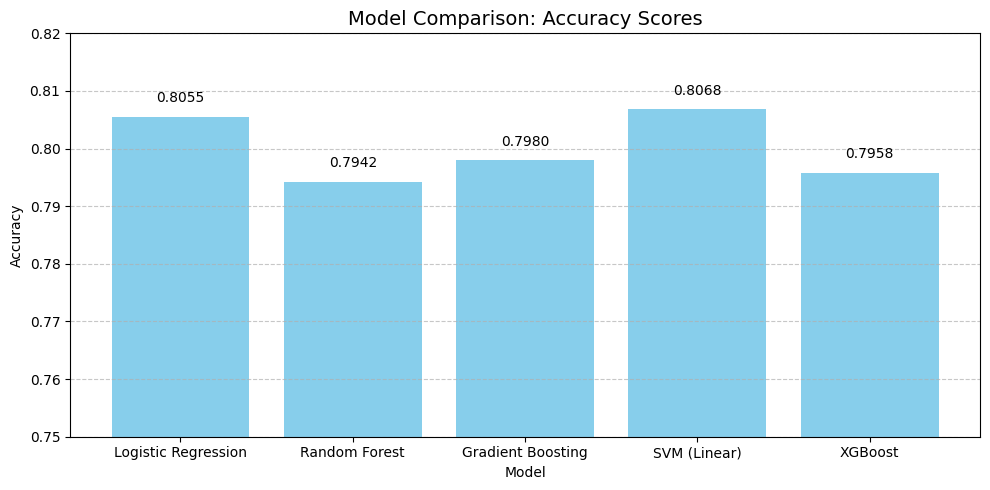

In [26]:
import matplotlib.pyplot as plt
models = [
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting",
    "SVM (Linear)",
    "XGBoost"
]

accuracies = [
    0.8055,  # Logistic Regression
    0.7942,  # Random Forest
    0.7980,  # Gradient Boosting
    0.8068,  # SVM
    0.7958   # XGBoost
]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color='skyblue')
plt.ylim(0.75, 0.82)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, f"{acc:.4f}",
             ha='center', va='bottom', fontsize=10)

plt.title("Model Comparison: Accuracy Scores", fontsize=14)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



--- Logistic Regression ---
Accuracy: 0.7980
Confusion Matrix:
[[1220  358]
 [ 284 1316]]


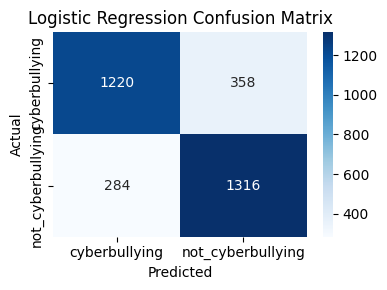


--- Random Forest ---
Accuracy: 0.7867
Confusion Matrix:
[[1229  349]
 [ 329 1271]]


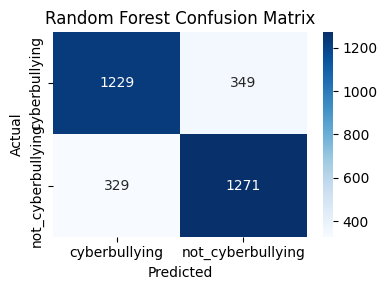


--- Gradient Boosting ---
Accuracy: 0.7867
Confusion Matrix:
[[1204  374]
 [ 304 1296]]


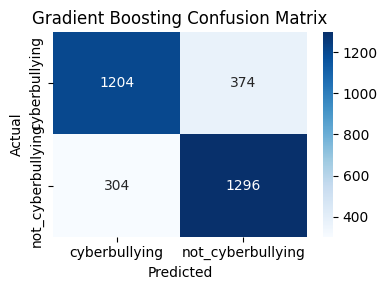


--- Linear SVC ---
Accuracy: 0.8033
Confusion Matrix:
[[1218  360]
 [ 265 1335]]


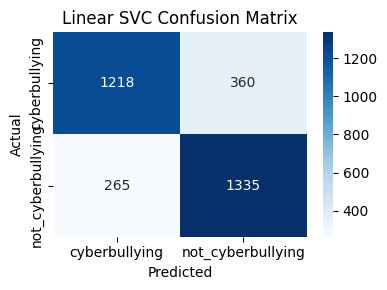


--- XGBoost Classifier ---
Accuracy: 0.7958
Confusion Matrix:
[[1193  385]
 [ 264 1336]]


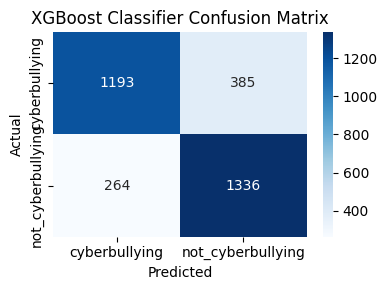


--- Tuned Random Forest ---
Accuracy: 0.7734
Confusion Matrix:
[[1255  323]
 [ 397 1203]]


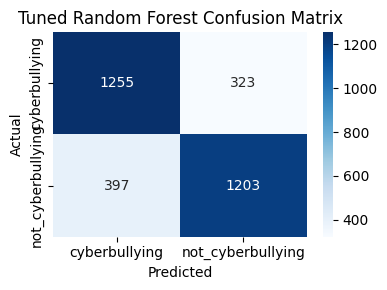


--- Tuned Gradient Boosting ---
Accuracy: 0.7867
Confusion Matrix:
[[1204  374]
 [ 304 1296]]


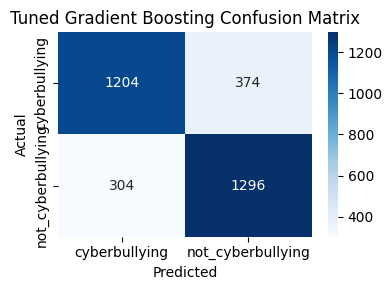


--- Tuned XGBoost ---
Accuracy: 0.7920
Confusion Matrix:
[[1194  384]
 [ 277 1323]]


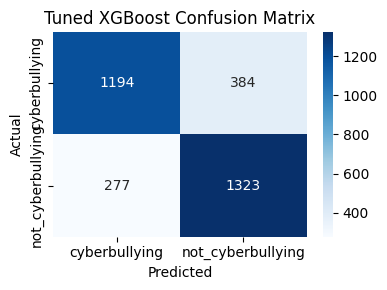


--- Voting Ensemble ---
Accuracy: 0.8011
Confusion Matrix:
[[1220  358]
 [ 274 1326]]


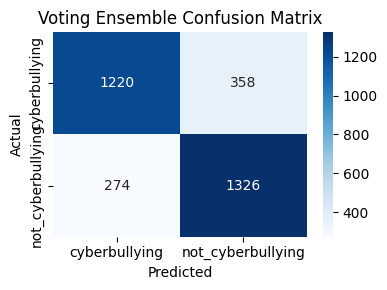


--- Stacking Ensemble ---
Accuracy: 0.7952
Confusion Matrix:
[[1205  373]
 [ 278 1322]]


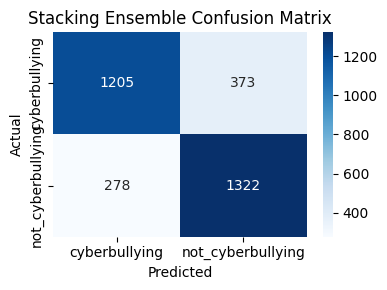

In [27]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# Baseline models
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_depth=8),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, learning_rate=0.1),
    "Linear SVC": LinearSVC(dual=False, max_iter=2000),  # Fixed 'dual' issue
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0)
}

# Tuned models
tuned_models = {}

grid_rf = RandomizedSearchCV(RandomForestClassifier(), {
    'n_estimators': [30], 'max_depth': [5]
}, n_iter=1, cv=2, n_jobs=1, random_state=42)
grid_rf.fit(X_train_raw, y_train)
tuned_models["Tuned Random Forest"] = grid_rf.best_estimator_

grid_gb = RandomizedSearchCV(GradientBoostingClassifier(), {
    'n_estimators': [30], 'learning_rate': [0.1]
}, n_iter=1, cv=2, n_jobs=1, random_state=42)
grid_gb.fit(X_train_raw, y_train)
tuned_models["Tuned Gradient Boosting"] = grid_gb.best_estimator_

grid_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0), {
    'n_estimators': [30], 'learning_rate': [0.1], 'max_depth': [4]
}, n_iter=1, cv=2, n_jobs=1, random_state=42)
grid_xgb.fit(X_train_raw, y_train)
tuned_models["Tuned XGBoost"] = grid_xgb.best_estimator_

# Voting classifier (scaled models where needed)
voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=300, solver='liblinear')),
        ('svc', LinearSVC(dual=False, max_iter=2000)),  # Fixed here too
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0))
    ],
    voting='hard',
    n_jobs=1  # Avoid parallelism issues
)
voting.fit(X_train_scaled, y_train)
tuned_models["Voting Ensemble"] = voting

# Stacking classifier
stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=30)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0))
    ],
    final_estimator=LogisticRegression(max_iter=300, solver='liblinear'),
    n_jobs=1
)
stacking.fit(X_train_raw, y_train)
tuned_models["Stacking Ensemble"] = stacking

# Combine all models
all_models = {**baseline_models, **tuned_models}

# Evaluate
for name, model in all_models.items():
    print(f"\n--- {name} ---")

    # Use scaled data for models that need it
    if isinstance(model, (LogisticRegression, LinearSVC, VotingClassifier)):
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_raw, y_train)
        y_pred = model.predict(X_test_raw)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [32]:
'''
import pandas as pd
import torch
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from joblib import Parallel, delayed

# Drop rows with missing values
df = df.dropna(subset=["tweet_text", "cyberbullying_type", "embeddings"])

# Filter for cyberbullying cases
cyber_df = df[df['cyberbullying_type'] == 'cyberbullying']

# Identify top words based on frequency (reduce to 80% of top words)
all_words = pd.Series(' '.join(cyber_df['tweet_text']).lower().split()).value_counts()
top_words = set(all_words.head(int(len(all_words) * 0.8)).index)

# Function to process each row and return an average vector of embeddings
def process_row(row, top_words):
    word_list = str(row['tweet_text']).lower().split()  # Process the tweet text
    embedding_list = row['embeddings']  # Extract the embedding list

    # Filter embeddings based on the words in the tweet
    selected_vectors = [vec for word, vec in zip(word_list, embedding_list) if word in top_words]
    
    # If no embeddings match, create a zero vector
    if selected_vectors:
        avg_vector = torch.stack(selected_vectors).mean(dim=0)
    else:
        avg_vector = torch.zeros(len(embedding_list[0]))  # Zero vector if no words match

    return avg_vector.numpy(), row['cyberbullying_type']

# Apply parallel processing to process each row
filtered_embeddings, labels = zip(*Parallel(n_jobs=-1)(delayed(process_row)(row, top_words) for _, row in df.iterrows()))

# Create feature matrix X and target vector y
X = pd.DataFrame(filtered_embeddings)
y = pd.Series(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Run RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=3, n_jobs=1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Output the best parameters found
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predictions and evaluation
y_pred = best_model.predict(X_test)

# Calculate accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
'''

'\nimport pandas as pd\nimport torch\nfrom sklearn.model_selection import train_test_split, RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nfrom collections import Counter\nfrom joblib import Parallel, delayed\n\n# Drop rows with missing values\ndf = df.dropna(subset=["tweet_text", "cyberbullying_type", "embeddings"])\n\n# Filter for cyberbullying cases\ncyber_df = df[df[\'cyberbullying_type\'] == \'cyberbullying\']\n\n# Identify top words based on frequency (reduce to 80% of top words)\nall_words = pd.Series(\' \'.join(cyber_df[\'tweet_text\']).lower().split()).value_counts()\ntop_words = set(all_words.head(int(len(all_words) * 0.8)).index)\n\n# Function to process each row and return an average vector of embeddings\ndef process_row(row, top_words):\n    word_list = str(row[\'tweet_text\']).lower().split()  # Process the tweet text\n    embeddi

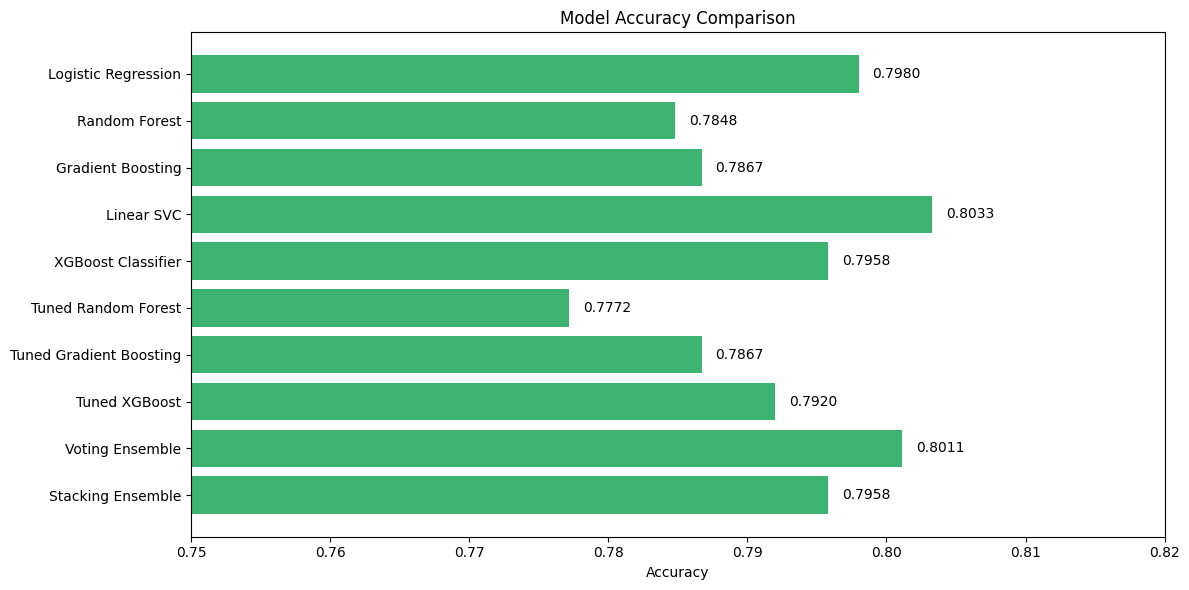

In [29]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
model_names = [
    "Logistic Regression", "Random Forest", "Gradient Boosting",
    "Linear SVC", "XGBoost Classifier", "Tuned Random Forest",
    "Tuned Gradient Boosting", "Tuned XGBoost", "Voting Ensemble",
    "Stacking Ensemble"
]

accuracies = [
    0.7980, 0.7848, 0.7867,
    0.8033, 0.7958, 0.7772,
    0.7867, 0.7920, 0.8011,
    0.7958
]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(model_names, accuracies, color='mediumseagreen')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0.75, 0.82)

# Annotate bars
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.tight_layout()
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.show()


In [30]:
df.head()

,tweet_text,cyberbullying_type,cleaned_tweet,embeddings,embedding_array
0,im so happy the bitch who used to bully me in ...,cyberbullying,im happy bitch used bully middle school fuckin...,"[[tensor(-0.3491), tensor(0.7061), tensor(-0.1...","[-0.3491119, 0.7060582, -0.13909394, -0.302954..."
1,@eljaverg @RicardoAlemanMx Dude are yuo talkin...,cyberbullying,dude yuo talking abaut familia yuo look idiot ...,"[[tensor(-0.3115), tensor(0.1762), tensor(-0.1...","[-0.31152302, 0.17616594, -0.14058499, -0.1179..."
2,@Eli_FlockaJames I can't! I'm not a cyber bull...,cyberbullying,cant im cyber bully sad face lol,"[[tensor(-0.4458), tensor(0.2628), tensor(-0.1...","[-0.44584754, 0.26278624, -0.1741748, -0.27723..."
3,Literally Who? Literally #LawAndOrderSVU.,not_cyberbullying,literally literally lawandordersvu,"[[tensor(-0.0716), tensor(0.1871), tensor(-0.2...","[-0.07156578, 0.1870789, -0.22874217, -0.26532..."
4,"When I get home, I have 1 million emails to an...",cyberbullying,get home 1 million emails answer httptcodayo0s...,"[[tensor(-0.1475), tensor(0.1208), tensor(0.09...","[-0.1474736, 0.12077151, 0.09264201, -0.103485..."
